In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv ("AirPassengers.csv")

In [6]:
df.head

<bound method NDFrame.head of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [7]:
df[0:2]

,Month,#Passengers
0,1949-01,112
1,1949-02,118


<BarContainer object of 144 artists>

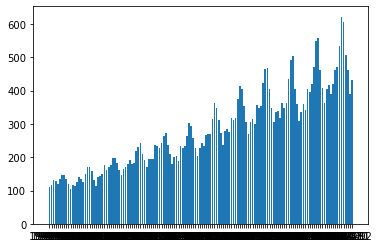

In [16]:
month = df['Month']
passengers = df['#Passengers']
plt.bar(month, passengers)